In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Build the gender classification model
def create_gender_classification_model(input_shape):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (128, 128, 3)
model = create_gender_classification_model(input_shape)

# Save the model
model.save('ppretrained_gender_classification_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
gender_model = load_model('/content/ppretrained_gender_classification_model.h5')

In [ ]:
import zipfile
import os

# Path to your zip file
zip_file_path = '/content/gen_classification.zip'

# Path to extract the zip file
extracted_folder = '/content/gen_classification/gen_classification'

In [ ]:
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Now, the dataset is extracted and ready to be used by ImageDataGenerator
# The structure inside `extracted_folder` should have subdirectories like 'male' and 'female' for training

# Training data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,   # Randomly zoom in on images
    horizontal_flip=True  # Randomly flip images horizontally
)

# Example: using the extracted path with ImageDataGenerator
train_data = train_datagen.flow_from_directory(
    os.path.join(extracted_folder, 'train'),  # Assuming 'train' is the folder for training data
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


# Validation data generator (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_data = validation_datagen.flow_from_directory(
    os.path.join(extracted_folder, 'validation'),  # Assuming 'validation' is the folder for validation data
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 1100 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# Train the model
model.fit(
    train_data,
    epochs=10,  # Number of epochs to train
    validation_data=validation_data  # Validation data for evaluation
)

# Save the trained model to a file for future use
model.save('fpretrained_gender_classification_model.h5')


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.6213 - loss: 0.7112 - val_accuracy: 0.7900 - val_loss: 0.4512
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7723 - loss: 0.4740 - val_accuracy: 0.8533 - val_loss: 0.3421
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8391 - loss: 0.3848 - val_accuracy: 0.8767 - val_loss: 0.3193
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8561 - loss: 0.3497 - val_accuracy: 0.8833 - val_loss: 0.3138
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.8560 - loss: 0.3216 - val_accuracy: 0.8933 - val_loss: 0.3132
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8475 - loss: 0.3422 - val_accuracy: 0.8733 - val_loss: 0.3145
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8614 - loss: 0.3384 - val_accuracy: 0.8433 - val_loss: 0.3616
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8808 - loss: 0.3077 - val_accuracy: 

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,750,277 (10.49 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,196 (1.25 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Assuming you have already set up your validation data generator
# Prepare the validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)

# Path to the extracted validation dataset
validation_path = os.path.join(extracted_folder, 'gen_classification', 'validation')

# Create validation data generator
validation_data = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_data)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Validation Loss: {val_loss:.4f}')


Found 300 images belonging to 2 classes.
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8553 - loss: 0.3195

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8694 - loss: 0.3091
Validation Accuracy: 89.00%
Validation Loss: 0.2915


gender distribution

In [ ]:
import os

def count_images(directory):
    counts = {'male': 0, 'female': 0}

    for gender in counts.keys():
        gender_path = os.path.join(directory, gender)
        if os.path.exists(gender_path):
            counts[gender] = len(os.listdir(gender_path))

    return counts

# Path to the dataset
dataset_path = '/content/gen_classification/gen_classification/train'  # Replace with your dataset path

# Count images in each category
image_counts = count_images(dataset_path)
print(f"Gender distribution in the training dataset: {image_counts}")


Gender distribution in the training dataset: {'male': 550, 'female': 550}


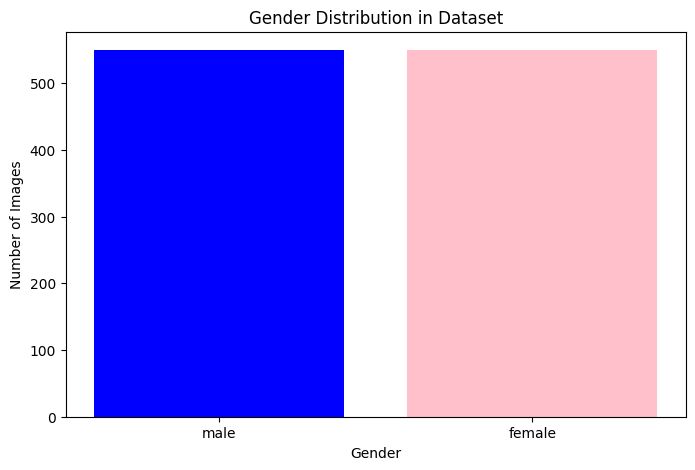

In [ ]:
import matplotlib.pyplot as plt

def plot_gender_distribution(counts):
    categories = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(8, 5))
    plt.bar(categories, values, color=['blue', 'pink'])
    plt.xlabel('Gender')
    plt.ylabel('Number of Images')
    plt.title('Gender Distribution in Dataset')
    plt.show()

# Plot the distribution
plot_gender_distribution(image_counts)
